In [1]:
import os
import pickle
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [81]:
dirname = '../pipeline/data/aa_sequence_analysis'

def file_to_dict(dirname, filename, val_type='str'):
    assert val_type in ['str', 'int']
    # Initialize sequence dict
    sequence_dict = {}
    with open(os.path.join(dirname, filename), 'r') as f:
        lines = [line.strip() for line in f.readlines()]
    key = lines[0][1:]
    sequence = []
    for line in lines[1:]:
        if line[0] == '>':
            sequence_dict[key] = sequence
            key = line[1:]
            sequence = []
        else:
            if val_type == 'str':
                sequence.extend(list(line))
            else:
                sequence.extend([int(v) for v in line.split()])
    return sequence_dict

In [82]:
acc_dict = file_to_dict(dirname, 'dataset.acc', 'str')
acc20_dict = file_to_dict(dirname, 'dataset.acc20', 'int')
ss_dict = file_to_dict(dirname, 'dataset.ss', 'str')
ss8_dict = file_to_dict(dirname, 'dataset.ss8', 'str')

In [100]:
def plot_heatmap(values, labels, save_name=None):
    """Generates a 1D heat map in lines of length n.
    
    Args:
      values: A list or string of values
      labels: A list or string of labels
      save_name: File name to save plot as. If None, plot will not be saved.
    
    """

    # This is the number of positions to plot per line
    # Note: Spacing between lines will break for n <= 25 
    #       Sizing of the last line will break for n >= 100
    n = 50

    # Number of lines that will be added to plot
    l = int(np.ceil(len(labels) / float(n)))

    # These multiplicative factors are important for keeping
    # the scaling of the last axis consistent with the others
    # scaling seems to get messed up when axis feels squished
    fig = plt.figure(figsize=(0.25 * n, 0.6 * l + 0.5), dpi=80)

    # For each line
    for i in range(l):
        try:
            # Obtain values and labels for that line
            vs = values[i * n: (i + 1) * n]
            ls = labels[i * n: (i + 1) * n]
        except:
            vs = values[i * n: -1]
            ls = labels[i * n: -1]
        
        # Generate masked array from data
        mat = np.ma.array([vs, vs])

        # Add subplot for a single line
        ax = fig.add_subplot(l, 1, i + 1)
        cmap = plt.cm.RdBu
        # Deals with missing data appropriate
        # Specified using masked array (this is the purpose of the masked array)
        cmap.set_bad(color='0.5', alpha=1.0)
        pc = plt.pcolormesh(mat, cmap=cmap,
                            vmin=0, vmax=100)
        
        # Axis
        ax.set_xlim([0, n])
        ax.set_ylim([0, 1])
        plt.setp(ax.get_yticklines(), visible=False)
        ax.yaxis.tick_left()
        ax.set_yticks([0.5])
        ax.set_yticklabels([str(i * n + 1) + ' '], size='small')
        ax.xaxis.tick_bottom()
        ax.set_xticks(np.arange(0.5, len(ls) + 0.5, 1))
        ax.set_xticklabels(ls, size='x-small')
        ax.set_aspect('equal')
        # Set anchor to the left
        ax.set_anchor('W')
        
        # Tight layout must be declared before changing position of last axis
        plt.tight_layout()
        # Tight layout will also not leave space at the bottom for colorbar
        # Parameter set below can be used to fix spacing issues
        plt.subplots_adjust(left=0.05, right=0.95, bottom=0.20, top=0.95)

        if i == l - 1:
            # Must come after other settings to size last axis correctly
            ax.set_xlim([0, len(vs)], auto=False)
            # Not that get_position and set_position refer
            # to [left bottom width height] as fractions of plotting area
            pos = ax.get_position().get_points()
            # rescale to accommodate shortened sequence
            # ax.set_position([pos[0][0], pos[0][1],
            #                  pos[1][0], pos[1][1]])
            # add_axes refers to [left bottom width height]
            # as fractions of plotting area
            ax_c = fig.add_axes([pos[0][0], 0.1, 0.8, 0.03])
            plt.colorbar(pc, orientation="horizontal", cax=ax_c)

    if save_name:
        plt.savefig(os.path.join(directory, save_name))
    else:
        plt.show()

In [101]:
print(acc_dict['BGC0000116.1_cppA'])
print(acc20_dict['BGC0000116.1_cppA'])
print(ss_dict['BGC0000116.1_cppA'])
print(ss8_dict['BGC0000116.1_cppA'])

['e', 'e', 'e', '-', 'e', 'e', 'e', 'e', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'e', 'e', 'e', '-', 'e', '-', '-', 'e', 'e', '-', '-', 'e', '-', '-', 'e', 'e', 'e', 'e', '-', '-', '-', '-', 'e', '-', '-', 'e', 'e', '-', 'e', '-', '-', '-', 'e', 'e', '-', '-', '-', 'e', 'e', 'e', 'e', 'e', '-', '-', '-', '-', 'e', '-', '-', '-', '-', 'e', '-', '-', 'e', 'e', '-', '-', '-', 'e', '-', '-', '-', '-', '-', '-', 'e', '-', '-', '-', '-', 'e', '-', 'e', 'e', '-', 'e', '-', '-', '-', 'e', '-', '-', '-', 'e', '-', '-', 'e', 'e', '-', 'e', '-', 'e', '-', 'e', '-', '-', 'e', '-', 'e', 'e', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'e', '-', 'e', 'e', '-', 'e', 'e', 'e', '-', 'e', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'e', '-', '-', '-', '-', '-', '-', 'e', '-', '-', '-', '-', 'e', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'e', '-', '-', 'e', 'e', 'e', 'e', '-', 'e', '-', '-', '-',

In [102]:
values = acc20_dict['BGC0000116.1_cppA']
labels = 'A' * len(values)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


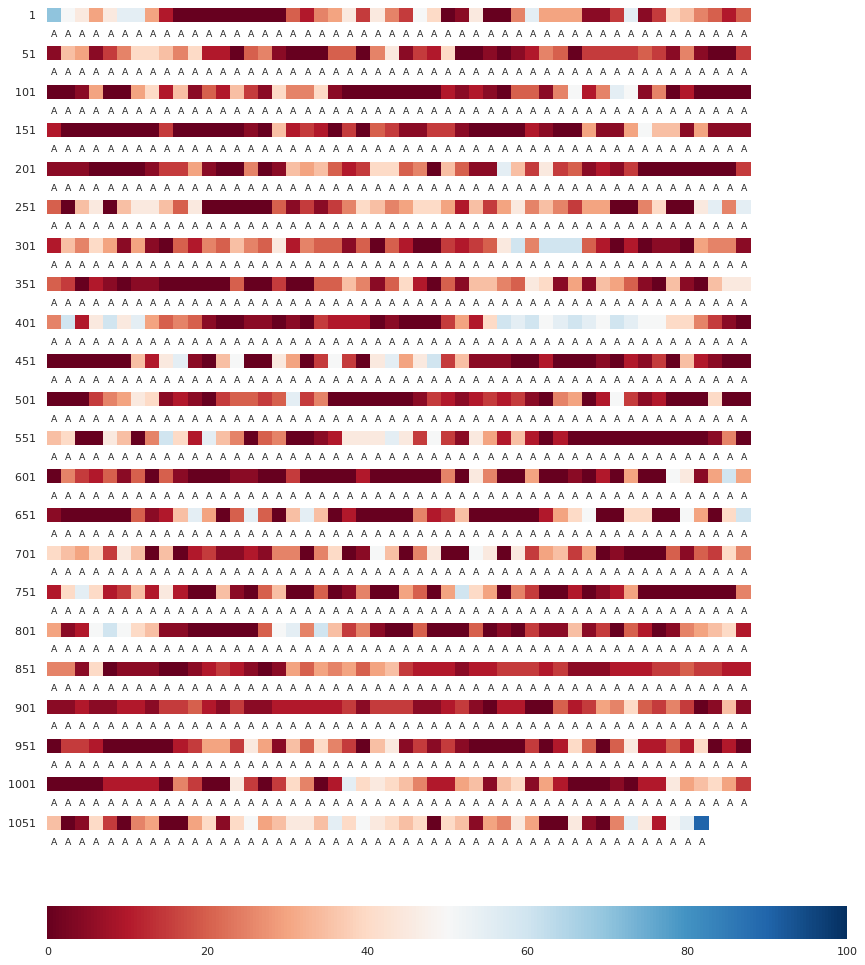

In [103]:
plot_heatmap(values, labels)